In [1]:
import os, gc, sys
from glob import glob
from tqdm.notebook import tqdm
import itertools
import pandas as pd

import re

In [2]:
prefix = os.getcwd().split("jdi-qasp-ml")[0]
sys.path.append(os.path.join(prefix, "jdi-qasp-ml"))
model_path = os.path.join(prefix, "jdi-qasp-ml", "HTML5_model/model")
df_path = os.path.join(prefix, "jdi-qasp-ml", "data/html5_dataset/df")

In [261]:
ds_files = glob(f"{df_path}/html5*.pkl")
df = pd.DataFrame()
for file in tqdm(ds_files[:200]):
    df_1 = pd.read_pickle(file)
    df_1['label'] = df_1.attributes.apply(lambda x: None if (None if x is None else x.get("data-label")) is None else x.get("data-label")).fillna("n/a")
    df_1['attributes_list'] = df_1.attributes.apply(lambda x: "" if x is None else " ".join(list(x.keys())))
    df_1["type"] = df_1.attributes.apply(lambda x: None if (None if x is None else x.get("type")) is None else x.get("type")).fillna("n/a")
    par_childs = {par:list(df_1[df_1.parent_id==par].element_id.unique()) for par in df_1.parent_id.unique()}
    df_1['childs'] = df_1['element_id'].apply(lambda x: par_childs.get(x))
    df_1["childs_types"] = df_1['childs'].apply(lambda l : [None] if l is None else [df_1[df_1.element_id==i].type.iloc[0] if df_1[df_1.element_id==i].type.iloc[0] != "n/a" else None for i in l])
    df_1["is_checkbox_in_childs"] = df_1["childs_types"].apply(lambda x: 1 if "checkbox" in x else 0)
    df = pd.concat([df, df_1]).reset_index(drop=True)

df.to_parquet(f"{prefix}jdi-qasp-ml/data/html5_dataset/html5_full_dataset.parquet")

  0%|          | 0/200 [00:00<?, ?it/s]

In [263]:
df[df.is_checkbox_in_childs == 1].head(1)

,attributes,displayed,element_id,height,html,onmouseenter,onmouseover,parent_id,style,tag_name,text,width,x,y,label,attributes_list,type,childs,childs_types,is_checkbox_in_childs
51,"{'class': 'dfbe3eed', 'data-label': 'checklist...",True,6683390098078084508699135713,85.0,"<div class=""dfbe3eed"" data-label=""checklist"" s...",None,None,8032743648078084503543244365,"[accent-color, align-content, align-items, ali...",DIV,While level against. Attorney not writer car...,1390.0,20.0,462.390625,checklist,class data-label id name style,n/a,"[7456886522078084504249607383, 858447317907808...","[None, checkbox, checkbox, None, checkbox, Non...",1


In [264]:
dataset = df[["element_id", "tag_name", "attributes_list", "type", "is_checkbox_in_childs", "label"]]

In [265]:
dataset.head()

,element_id,tag_name,attributes_list,type,is_checkbox_in_childs,label
0,0809906671078084501665676798,HTML,lang,n/a,0,n/a
1,5891624283078084501571212505,HEAD,,n/a,0,n/a
2,5133691120078084500411884346,META,charset,n/a,0,n/a
3,1058754413078084505121525016,TITLE,,n/a,0,n/a
4,5309950261078084506037331365,STYLE,,n/a,0,n/a


In [266]:
dataset[dataset.type=="radio"]

,element_id,tag_name,attributes_list,type,is_checkbox_in_childs,label
18,2534182146078084505241997665,INPUT,checked class data-label id name style type,radio,0,radiobutton
21,9063877815078084501967175070,INPUT,class data-label id name style type,radio,0,radiobutton
24,5461759438078084503092714112,INPUT,checked class data-label disabled id name styl...,radio,0,radiobutton
27,7248976656078084503148760249,INPUT,checked class data-label id name style type,radio,0,radiobutton
31,3845689118078084503982038754,INPUT,class data-label disabled id name style type,radio,0,radiobutton
...,...,...,...,...,...,...
149612,8911728902080354298118283814,INPUT,class data-label id name style type,radio,0,radiobutton
149615,9981274809080354291673842468,INPUT,class data-label id name style type,radio,0,radiobutton
149618,8815992616080354296503042321,INPUT,class data-label id name style type,radio,0,radiobutton
149622,5721396180080354296325397771,INPUT,class data-label id name style type,radio,0,radiobutton


In [267]:
df.label.unique()

array(['n/a', 'textfield', 'fileinput', 'label', 'range', 'radiobutton',
       'numberselector', 'progressbar', 'link', 'datetimeselector',
       'checklist', 'checkbox', 'button', 'title', 'multiselector',
       'colorpicker', 'multidropdown', 'text', 'table', 'dropdown',
       'datalist', 'textarea'], dtype=object)

In [268]:
(dataset["type"].apply(lambda x: 1 if "radio" == x else 0)).sum()

7940

In [269]:
dataset

,element_id,tag_name,attributes_list,type,is_checkbox_in_childs,label
0,0809906671078084501665676798,HTML,lang,n/a,0,n/a
1,5891624283078084501571212505,HEAD,,n/a,0,n/a
2,5133691120078084500411884346,META,charset,n/a,0,n/a
3,1058754413078084505121525016,TITLE,,n/a,0,n/a
4,5309950261078084506037331365,STYLE,,n/a,0,n/a
...,...,...,...,...,...,...
149667,4978410227080354293240665151,OPTION,class data-label disabled id name style,n/a,0,n/a
149668,4514269074080354294492332126,OPTION,class data-label id name style,n/a,0,n/a
149669,8022575145080354295631618715,OPTION,class data-label id name style,n/a,0,n/a
149670,9410975787080354298238867158,OPTION,class data-label id name style,n/a,0,n/a


In [270]:
dataset[dataset.type.apply(lambda x: True if 'application/EDI-X12' in x else False)]

,element_id,tag_name,attributes_list,type,is_checkbox_in_childs,label
2818,4869601647088662362827381350,A,class data-label disabled href id name rel sty...,application/EDI-X12,0,link
79608,9716252159089245197823692757,A,class data-label disabled href id name rel sty...,application/EDI-X12,0,link
97287,6852665709080799568336228139,A,class data-label href id name referrerpolicy s...,application/EDI-X12,0,link


In [271]:
dataset.type.unique()

array(['n/a', 'text', 'file', 'range', 'radio', 'number', 'week',
       'checkbox', 'datetime-local', 'color', 'time', 'button', 'reset',
       'submit', 'model/vrml', 'month', 'date', 'model/x3d+binary',
       'application/gzip', 'application/ecmascript', 'text/xml',
       'multipart/mixed', 'audio/vnd.rn-realaudio', 'video/mpeg',
       'model/example', 'application/EDI-X12', 'audio/mpeg', 'video/webm',
       'video/mp4', 'video/x-matroska', 'image/gif', 'text/html',
       'image/pjpeg', 'message/http', 'model/x3d+vrml',
       'message/imdn+xml', 'text/javascript', 'multipart/form-data',
       'multipart/encrypted', 'model/iges', 'multipart/alternative',
       'message/rfc822', 'audio/vorbis', 'video/x-ms-wmv',
       'multipart/related', 'multipart/signed', 'message/partial',
       'audio/vnd.wave', 'image/tiff', 'image/vnd.microsoft.icon',
       'video/x-flv', 'application/xop+xml', 'text/csv',
       'application/zip', 'image/jpeg', 'application/xhtml+xml',
       'mode

In [272]:
buf_types = set([i for i in dataset.type.unique() if (not "/" in i or i == "n/a")])
buf_types

{'button',
 'checkbox',
 'color',
 'date',
 'datetime-local',
 'file',
 'month',
 'n/a',
 'number',
 'radio',
 'range',
 'reset',
 'submit',
 'text',
 'time',
 'week'}

In [273]:
buf = re.sub(" +", " ", " ".join(dataset.attributes_list.to_list()))
attr_columns = list(set([i for i in set(buf.split(" ")) if "font-size" not in i]) - set(["data-label", "label", "id", "name", "type", "class", "style", "disabled"]))
tag_columns = list(dataset.tag_name.unique())
type_columns = list(buf_types-set(["n/a"]))
print(attr_columns)
print(tag_columns)
print(type_columns)

['ping', 'autocomplete', 'required', 'cols', 'maxlength', 'rel', 'formaction', 'value', 'max', 'min', 'list', 'href', 'formenctype', 'accept', 'step', 'wrap', 'size', 'pattern', 'charset', 'spellcheck', 'multiple', 'lang', 'minlength', 'checked', 'for', 'target', 'readonly', 'download', 'placeholder', 'indeterminate', 'referrerpolicy', 'capture', 'rows']
['HTML', 'HEAD', 'META', 'TITLE', 'STYLE', 'BODY', 'DIV', 'INPUT', 'LABEL', 'DATALIST', 'P', 'BR', 'PROGRESS', 'A', 'BUTTON', 'H3', 'SELECT', 'OPTION', 'H5', 'FORM', 'H1', 'TABLE', 'TBODY', 'TR', 'TD', 'TEXTAREA', 'H2', 'H4', 'H6']
['time', 'submit', 'button', 'week', 'color', 'radio', 'number', 'reset', 'checkbox', 'datetime-local', 'range', 'text', 'date', 'file', 'month']


In [274]:
for col in tqdm(attr_columns):
    dataset.loc[:, "attr_"+col] = dataset.loc[:, "attributes_list"].apply(lambda x: 1 if col in x else 0).values

for col in tqdm(tag_columns):
    dataset.loc[:, "tag_"+col] = dataset.loc[:, "tag_name"].apply(lambda x: 1 if col == x else 0).values

for col in tqdm(type_columns):
    dataset.loc[:, "type_"+col] = dataset.loc[:, "type"].apply(lambda x: 1 if col == x else 0).values

attr_columns = ["attr_"+col for col in attr_columns]

tag_columns = ["tag_"+col for col in tag_columns]

type_columns = ["type_"+col for col in type_columns]


  0%|          | 0/33 [00:00<?, ?it/s]

/Users/Mikhail_Bulgakov/opt/anaconda3/envs/jdi-qasp-ml/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [275]:
print(attr_columns)
print(tag_columns)
print(type_columns)

['attr_ping', 'attr_autocomplete', 'attr_required', 'attr_cols', 'attr_maxlength', 'attr_rel', 'attr_formaction', 'attr_value', 'attr_max', 'attr_min', 'attr_list', 'attr_href', 'attr_formenctype', 'attr_accept', 'attr_step', 'attr_wrap', 'attr_size', 'attr_pattern', 'attr_charset', 'attr_spellcheck', 'attr_multiple', 'attr_lang', 'attr_minlength', 'attr_checked', 'attr_for', 'attr_target', 'attr_readonly', 'attr_download', 'attr_placeholder', 'attr_indeterminate', 'attr_referrerpolicy', 'attr_capture', 'attr_rows']
['tag_HTML', 'tag_HEAD', 'tag_META', 'tag_TITLE', 'tag_STYLE', 'tag_BODY', 'tag_DIV', 'tag_INPUT', 'tag_LABEL', 'tag_DATALIST', 'tag_P', 'tag_BR', 'tag_PROGRESS', 'tag_A', 'tag_BUTTON', 'tag_H3', 'tag_SELECT', 'tag_OPTION', 'tag_H5', 'tag_FORM', 'tag_H1', 'tag_TABLE', 'tag_TBODY', 'tag_TR', 'tag_TD', 'tag_TEXTAREA', 'tag_H2', 'tag_H4', 'tag_H6']
['type_time', 'type_submit', 'type_button', 'type_week', 'type_color', 'type_radio', 'type_number', 'type_reset', 'type_checkbox',

In [276]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset["label"] = le.fit_transform(dataset["label"])

In [277]:
DF = dataset[tag_columns + attr_columns 
                + type_columns 
                + ["is_checkbox_in_childs", "label"]]

In [278]:
pd.DataFrame({"classes":le.classes_, "codes": le.transform(le.classes_)})

,classes,codes
0,button,0
1,checkbox,1
2,checklist,2
3,colorpicker,3
4,datalist,4
5,datetimeselector,5
6,dropdown,6
7,fileinput,7
8,label,8
9,link,9


In [279]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [280]:
DF.shape

(149672, 79)

In [281]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy={i:30000 for i in le.transform(le.classes_) if i != 12})

In [282]:
X_train, X_test, y_train, y_test = train_test_split(DF.drop(columns=["label"]), DF.label, test_size=0.2)
X_over, y_over = ros.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_over.shape)

(119737, 78)
(697296, 78)


In [283]:
X_train.columns

Index(['tag_HTML', 'tag_HEAD', 'tag_META', 'tag_TITLE', 'tag_STYLE',
       'tag_BODY', 'tag_DIV', 'tag_INPUT', 'tag_LABEL', 'tag_DATALIST',
       'tag_P', 'tag_BR', 'tag_PROGRESS', 'tag_A', 'tag_BUTTON', 'tag_H3',
       'tag_SELECT', 'tag_OPTION', 'tag_H5', 'tag_FORM', 'tag_H1', 'tag_TABLE',
       'tag_TBODY', 'tag_TR', 'tag_TD', 'tag_TEXTAREA', 'tag_H2', 'tag_H4',
       'tag_H6', 'attr_ping', 'attr_autocomplete', 'attr_required',
       'attr_cols', 'attr_maxlength', 'attr_rel', 'attr_formaction',
       'attr_value', 'attr_max', 'attr_min', 'attr_list', 'attr_href',
       'attr_formenctype', 'attr_accept', 'attr_step', 'attr_wrap',
       'attr_size', 'attr_pattern', 'attr_charset', 'attr_spellcheck',
       'attr_multiple', 'attr_lang', 'attr_minlength', 'attr_checked',
       'attr_for', 'attr_target', 'attr_readonly', 'attr_download',
       'attr_placeholder', 'attr_indeterminate', 'attr_referrerpolicy',
       'attr_capture', 'attr_rows', 'type_time', 'type_submit', 'type_

In [284]:
print(X_test.shape)

(29935, 78)


In [285]:
X_train.columns

Index(['tag_HTML', 'tag_HEAD', 'tag_META', 'tag_TITLE', 'tag_STYLE',
       'tag_BODY', 'tag_DIV', 'tag_INPUT', 'tag_LABEL', 'tag_DATALIST',
       'tag_P', 'tag_BR', 'tag_PROGRESS', 'tag_A', 'tag_BUTTON', 'tag_H3',
       'tag_SELECT', 'tag_OPTION', 'tag_H5', 'tag_FORM', 'tag_H1', 'tag_TABLE',
       'tag_TBODY', 'tag_TR', 'tag_TD', 'tag_TEXTAREA', 'tag_H2', 'tag_H4',
       'tag_H6', 'attr_ping', 'attr_autocomplete', 'attr_required',
       'attr_cols', 'attr_maxlength', 'attr_rel', 'attr_formaction',
       'attr_value', 'attr_max', 'attr_min', 'attr_list', 'attr_href',
       'attr_formenctype', 'attr_accept', 'attr_step', 'attr_wrap',
       'attr_size', 'attr_pattern', 'attr_charset', 'attr_spellcheck',
       'attr_multiple', 'attr_lang', 'attr_minlength', 'attr_checked',
       'attr_for', 'attr_target', 'attr_readonly', 'attr_download',
       'attr_placeholder', 'attr_indeterminate', 'attr_referrerpolicy',
       'attr_capture', 'attr_rows', 'type_time', 'type_submit', 'type_

In [286]:
DecisionTreeClassifier()._get_param_names()

['ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'random_state',
 'splitter']

In [287]:
parameters = {'max_depth':range(15,25), 'criterion': ["gini", "entropy"], 'min_samples_split': range(2,5), 'min_samples_leaf': range(1,2)}
clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=-1)
clf.fit(X=X_over, y=y_over)
tree_model = clf.best_estimator_

In [288]:
clf.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 24,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [289]:
from sklearn.metrics import classification_report, confusion_matrix

In [290]:
print(classification_report(y_over, tree_model.predict(X_over), target_names=le.classes_))

                  precision    recall  f1-score   support

          button       1.00      1.00      1.00     30000
        checkbox       1.00      1.00      1.00     30000
       checklist       1.00      1.00      1.00     30000
     colorpicker       1.00      1.00      1.00     30000
        datalist       1.00      1.00      1.00     30000
datetimeselector       1.00      1.00      1.00     30000
        dropdown       1.00      1.00      1.00     30000
       fileinput       1.00      1.00      1.00     30000
           label       0.93      1.00      0.96     30000
            link       1.00      1.00      1.00     30000
   multidropdown       1.00      1.00      1.00     30000
   multiselector       1.00      1.00      1.00     30000
             n/a       1.00      0.95      0.97     67296
  numberselector       1.00      1.00      1.00     30000
     progressbar       1.00      1.00      1.00     30000
     radiobutton       1.00      1.00      1.00     30000
           ra

In [291]:
y_pred = tree_model.predict(X_test)

In [292]:

print(classification_report(y_test, y_pred, target_names=le.classes_))

                  precision    recall  f1-score   support

          button       1.00      1.00      1.00       286
        checkbox       1.00      1.00      1.00      1927
       checklist       1.00      1.00      1.00       291
     colorpicker       1.00      1.00      1.00       296
        datalist       1.00      1.00      1.00       257
datetimeselector       1.00      1.00      1.00       288
        dropdown       1.00      1.00      1.00       267
       fileinput       1.00      1.00      1.00       280
           label       0.89      1.00      0.94      4573
            link       1.00      1.00      1.00       293
   multidropdown       1.00      1.00      1.00       277
   multiselector       1.00      1.00      1.00       279
             n/a       1.00      0.95      0.97     16863
  numberselector       1.00      1.00      1.00       293
     progressbar       1.00      1.00      1.00       282
     radiobutton       1.00      1.00      1.00      1557
           ra

In [207]:
# print((y_pred[y_test != 7]))
# print((y_test[y_test != 7]))

In [293]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test[y_test != 12], y_pred[y_test != 12])

1.0

In [294]:
test_res = pd.DataFrame({"y_test":y_test, "y_pred":y_pred, "label_test":le.inverse_transform(y_test), "label_pred":le.inverse_transform(y_pred)})
test_res["str"] = test_res.label_test+ "-" +test_res.label_pred

In [295]:
test_res[test_res.y_test != test_res.y_pred]

,y_test,y_pred,label_test,label_pred,str
80432,12,8,n/a,label,n/a-label
124361,12,8,n/a,label,n/a-label
97076,12,8,n/a,label,n/a-label
32207,12,8,n/a,label,n/a-label
38339,12,8,n/a,label,n/a-label
...,...,...,...,...,...
54528,12,8,n/a,label,n/a-label
16786,12,18,n/a,text,n/a-text
64417,12,8,n/a,label,n/a-label
35407,12,18,n/a,text,n/a-text


In [296]:
df[df.label.isin(['checklist'])].attributes_list

51        class data-label id name style
358       class data-label id name style
382       class data-label id name style
521       class data-label id name style
546       class data-label id name style
                       ...              
149245    class data-label id name style
149320    class data-label id name style
149471    class data-label id name style
149497    class data-label id name style
149512    class data-label id name style
Name: attributes_list, Length: 1389, dtype: object

In [297]:
test_res[test_res.y_test != test_res.y_pred].str.unique()

array(['n/a-label', 'n/a-text'], dtype=object)

In [298]:
df[(df.tag_name=='P')&(df.label!='text')]

,attributes,displayed,element_id,height,html,onmouseenter,onmouseover,parent_id,style,tag_name,text,width,x,y,label,attributes_list,type,childs,childs_types,is_checkbox_in_childs
16,{'style': 'color:#088782; font-size:22px;'},True,2651610479078084501442202377,26.0,"<p style=""color:#088782; font-size:22px;"">War ...",None,None,8032743648078084503543244365,"[accent-color, align-content, align-items, ali...",P,War meet herself science friend learn me.,1390.00000,20.000000,113.000000,n/a,style,n/a,None,[None],0
98,{'style': 'color:#2b2b2b; font-size:28px;'},True,8302377167078084501738701581,32.0,"<p style=""color:#2b2b2b; font-size:28px;"">Writ...",None,None,8032743648078084503543244365,"[accent-color, align-content, align-items, ali...",P,Writer certain draw would whatever tell anyone...,1390.00000,20.000000,1001.968750,n/a,style,n/a,None,[None],0
324,{'style': 'color:#158701; font-size:16px;'},True,4434927175078084513253640271,18.0,"<p style=""color:#158701; font-size:16px;"">Nort...",None,None,8032743648078084503543244365,"[accent-color, align-content, align-items, ali...",P,North improve send short least occur soldier m...,1390.00000,20.000000,3177.890625,n/a,style,n/a,None,[None],0
457,{'style': 'color:#2d2d2d; font-size:17px;'},True,6177503640078084511624931827,20.0,"<p style=""color:#2d2d2d; font-size:17px;"">Boar...",None,None,8032743648078084503543244365,"[accent-color, align-content, align-items, ali...",P,Board red best main man mention gun claim avai...,1390.00000,20.000000,5751.125000,n/a,style,n/a,None,[None],0
685,{'style': 'color:#a51035; font-size:26px;'},True,1514227186089494699657745264,30.0,"<p style=""color:#a51035; font-size:26px;"">Abou...",None,None,7812701305089494692299805329,"[accent-color, align-content, align-items, ali...",P,About prove kid minute parent soon.,1376.00000,27.000000,1428.062500,n/a,style,n/a,None,[None],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148916,{'style': 'color:#011e75; font-size:17px;'},True,2071588355080354277402820220,20.0,"<p style=""color:#011e75; font-size:17px;"">Pull...",None,None,8761911367080354270308746433,"[accent-color, align-content, align-items, ali...",P,Pull administration finish type myself yard ro...,1390.00000,20.000000,96.000000,n/a,style,n/a,None,[None],0
149017,{'style': 'color:#003577; font-size:15px;'},True,4388476118080354287269762668,34.0,"<p style=""color:#003577; font-size:15px;"">Syst...",None,None,7575326749080354281554419829,"[accent-color, align-content, align-items, ali...",P,System cut this them citizen American else small.,264.18750,371.390625,809.312500,n/a,style,n/a,None,[None],0
149529,{'style': 'color:#107f08; font-size:19px;'},True,3658366837080354294965323940,22.0,"<p style=""color:#107f08; font-size:19px;"">Same...",None,None,4205832452080354297432555882,"[accent-color, align-content, align-items, ali...",P,Same alone trade every financial describe impr...,965.34375,34.000000,7126.171875,n/a,style,n/a,None,[None],0
149562,{'style': 'color:#25960f; font-size:22px;'},True,0260143482080354291724875432,26.0,"<p style=""color:#25960f; font-size:22px;"">Into...",None,None,3980742720080354292820144625,"[accent-color, align-content, align-items, ali...",P,Into painting always become move test service ...,963.34375,35.000000,7428.171875,n/a,style,n/a,None,[None],0


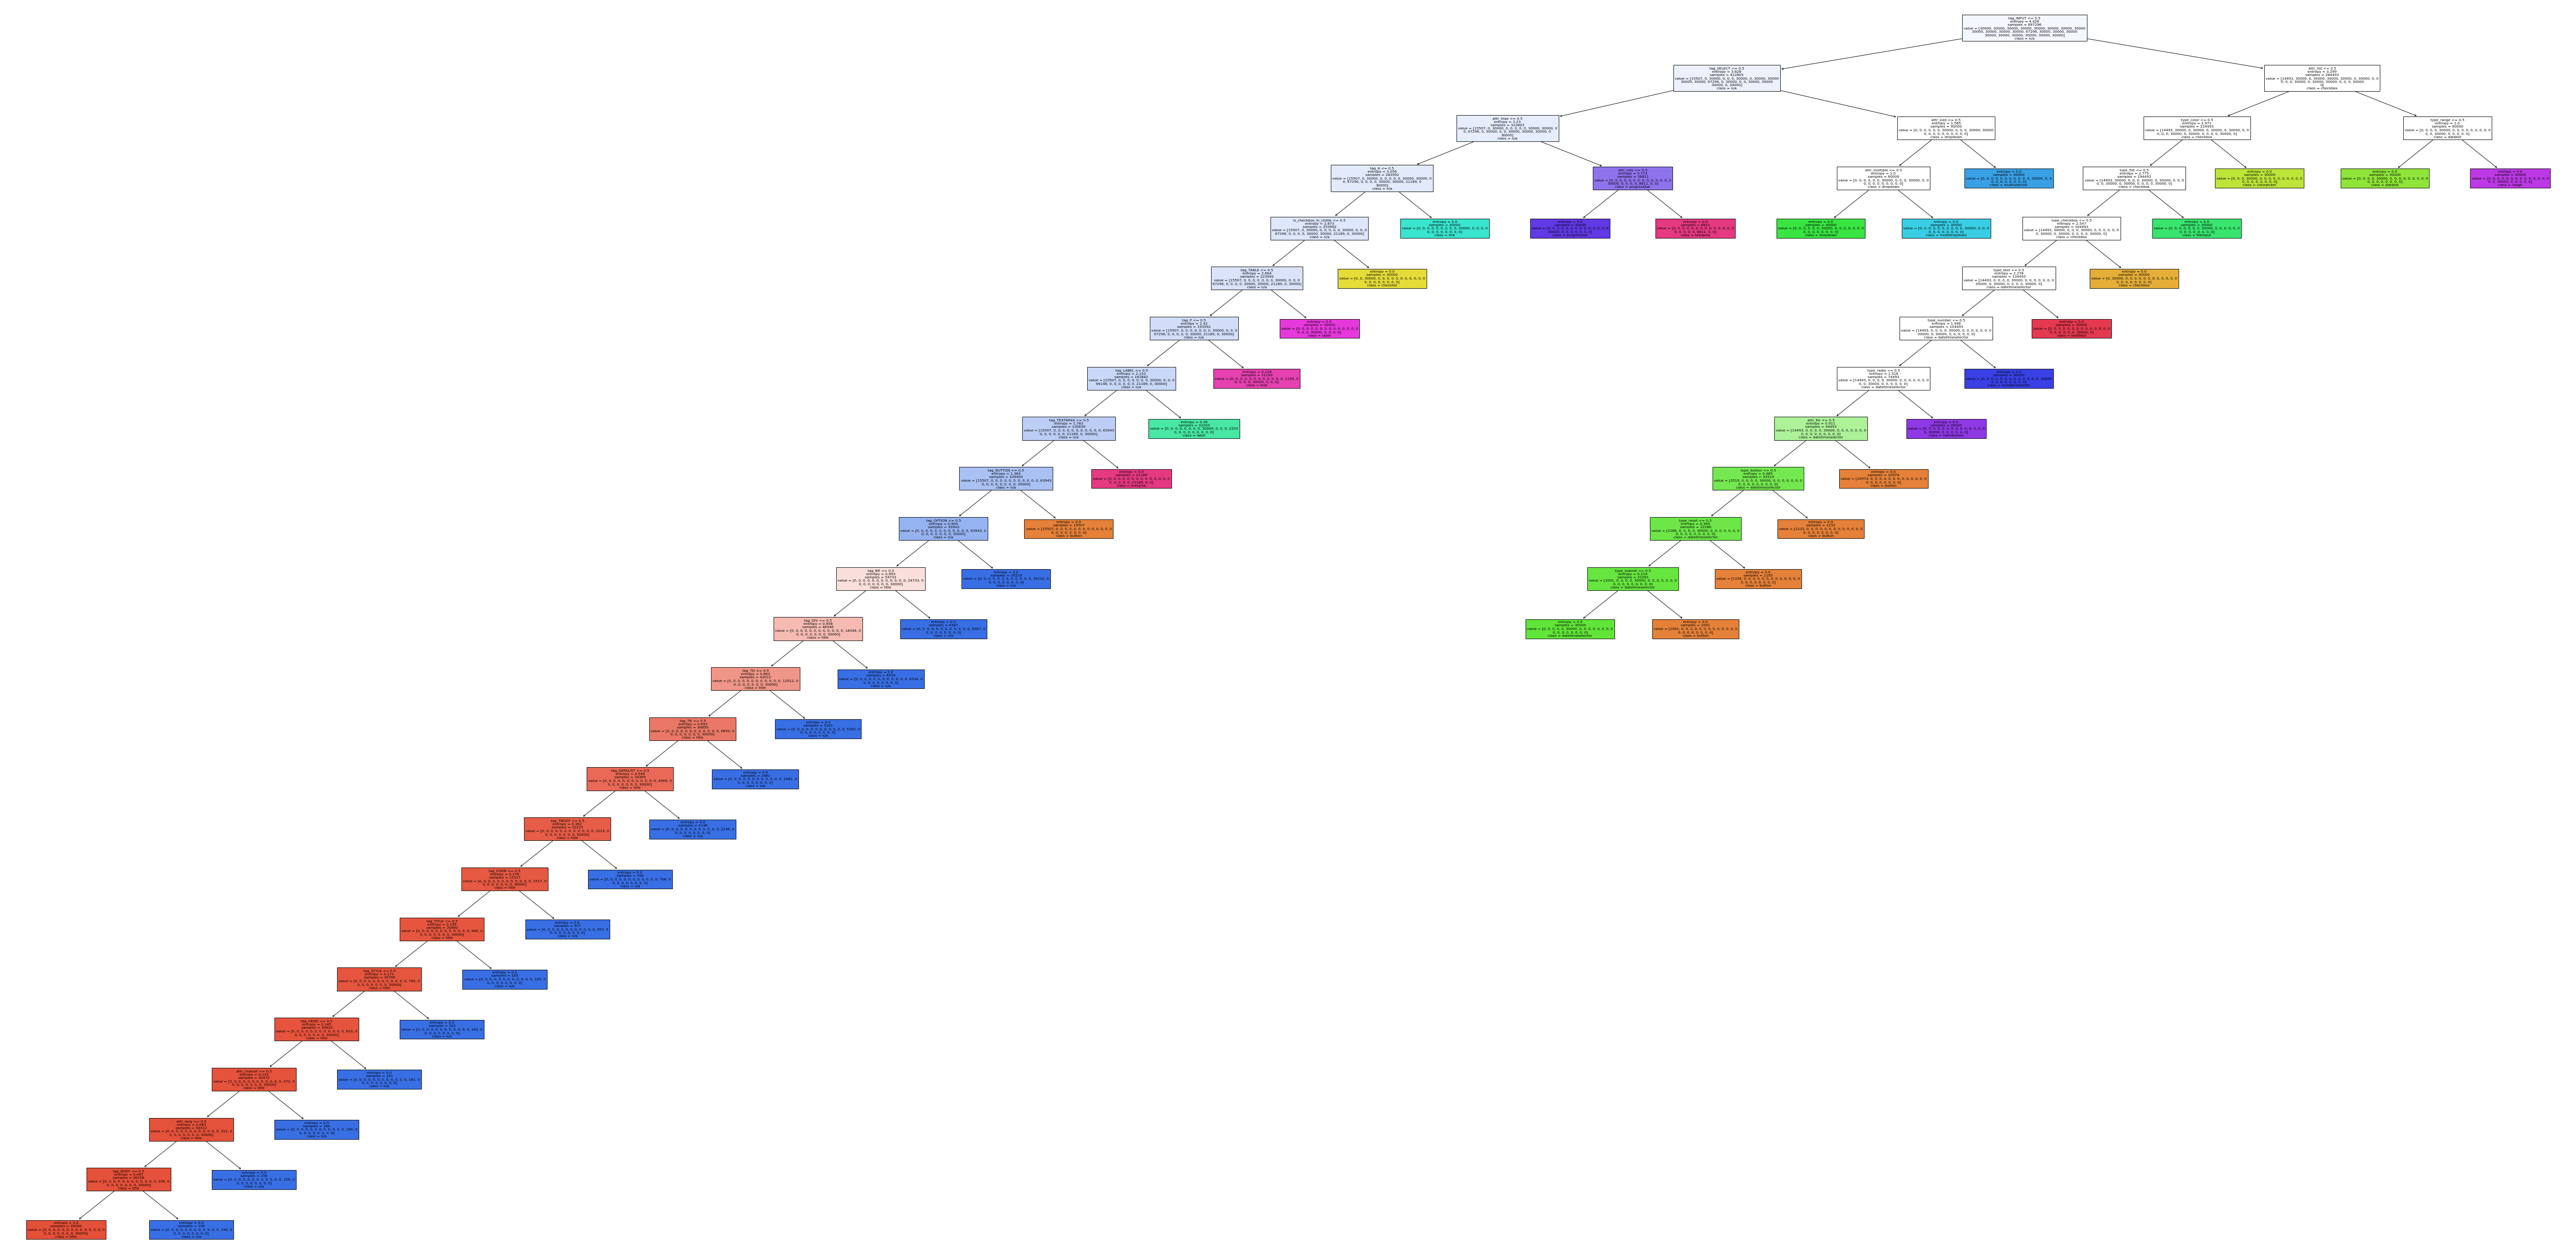

In [299]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,50))
_ = tree.plot_tree(tree_model, 
                   feature_names=X_train.columns,  
                   class_names=le.classes_,
                   filled=True)